# Парное выравнивание

# Порядок сдачи домашнего

Вам требуется создать гит репозиторий куда вы будете складывать все ваши домашние. Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювера назначаете из таблицы - https://docs.google.com/spreadsheets/d/1vK6IgEqaqXniUJAQOOspiL_tx3EYTSXW1cUrMHAZFr8/edit?gid=0#gid=0
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 30 сентября 10:00**

# Введение

**Выравнивание последовательностей** — фундаментальный инструмент в биоинформатике, позволяющий сравнивать биологические последовательности (ДНК, РНК, белки) для выявления сходства, которое может указывать на функциональные, структурные или эволюционные связи между ними.

**Парное выравнивание** подразумевает сравнение двух последовательностей для определения наилучшего соответствия между их элементами (нуклеотидами или аминокислотами). Существует два основных типа парного выравнивания:

- **Глобальное выравнивание**: направлено на выравнивание всей длины двух последовательностей, максимально учитывая все элементы.
- **Локальное выравнивание**: нацелено на поиск наилучшего соответствующего участка внутри двух последовательностей.

В данном домашнем задании мы с вами сконцентрируемся на **глобальном выравнивании**.

### Пример парного выравнивания

Рассмотрим две нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G A
Последовательность 2 (Seq2): G C T A G A
```

**Глобальное выравнивание** (учитывает всю длину последовательностей):

```
Seq1: A G C T A C G A
Seq2: - G C T A - G A
```

### Значение выравнивания последовательностей

- **Эволюционные связи**: Сходство между последовательностями может указывать на общих предков.
- **Функциональные домены**: Выравнивание помогает идентифицировать консервативные участки, важные для функции белка или нуклеиновой кислоты.
- **Геномные исследования**: Используется для аннотации генов, предсказания структур и понимания генетических вариаций.

## Алгоритм выравнивания

- Для автоматизации процесса выравнивания используется **Алгоритм Нидлмана-Вунша**. Он предназначен для глобального выравнивания и использует динамическое программирование для нахождения оптимального выравнивания по всей длине последовательностей.
- Для оценки сходства при выравнивании белковых последовательностей используется матрица **BLOSUM** (Blocks Substitution Matrix). Матрицы BLOSUM создаются на основе статистического анализа реальных белковых множественных выравниваний последовательностей.

### Пример множественного выравнивания (для построения матрциы BLOSUM)

Рассмотрим нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G T G T C G C T G A A T C T A T G A C T
Последовательность 2 (Seq2): G C T A G A G C A A G G C A A C T G C A T C T
Последовательность 3 (Seq3): A C T G C A C C C A T G A A C C T C G C G C T
Последовательность 4 (Seq4): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 5 (Seq5): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 6 (Seq6): A C T G C A C C C A T G A A C C T C T C A C T
Последовательность 7 (Seq7): A C T G C A C C C A T G A A C C T C T C A C T
```

**Множественное выравнивание**:

```
Seq1: A G C T A C G T G T C G C T G A A T C T A T G A C T
Seq2: - G C T A - G A G C A - A G G C A A C T G C A T C T
Seq3: A - C T G - C A C C C - A T G A A C C T C G C G C T
Seq4: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq5: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq6: A - C T G - C A C C C - A T G A A C C T C T C A C T
Seq7: A - C T G - C A C C C - A T G A A C C T C T C A C T
```

Перед тем как приступать к реализации парного выравнивания давайте научимся считать матрицу BLOSUM.

# Матрица BLOSUM

## Подсчет частот пар нуклеотидов

### Шаг 1.1: Генерация пар нуклеотидов

Напишите функцию `generate_pairs(alignments)`, которая проходит по всем позициям выравнивания (одного столбца) и генерирует все возможные пары нуклеотидов в этой позиции.

**Пример**:

Рассмотрим на примере множественного выравнивания выше:

```
generate_pairs(["A", "A", "G"])
[('A', 'A'), ('A', 'G'), ('A', 'G')]

generate_pairs(["T", "T", "T"])
[('T', 'T'), ('T', 'T'), ('T', 'T')]

generate_pairs(["G", "G", "-"])
[('G', 'G'), ('G', '-'), ('G', '-')]

len(generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A']))
21
```

In [38]:
alignments = ["AGCTACGTGTCGCTGAATCTATGACT",
              "-GCTA-GAGCA-AGGCAACTGCATCT",
              "A-CTG-CACCC-ATGAACCTCGCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCACT",
              "A-CTG-CACCC-ATGAACCTCTCACT"
             ]

In [39]:
import unittest
from itertools import combinations

In [40]:
def generate_pairs(alignments):
    return list(combinations(alignments, 2))

In [41]:
generate_pairs(["G", "G", "-"])

[('G', 'G'), ('G', '-'), ('G', '-')]

In [42]:
len(generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A']))

21

In [43]:
class TestGeneratePairs(unittest.TestCase):

    def test_example_1(self):
        result = generate_pairs(["A", "A", "G"])
        expected = [('A', 'A'), ('A', 'G'), ('A', 'G')]
        self.assertEqual(result, expected)

    def test_example_2(self):
        result = generate_pairs(["T", "T", "T"])
        expected = [('T', 'T'), ('T', 'T'), ('T', 'T')]
        self.assertEqual(result, expected)

    def test_example_3(self):
        result = generate_pairs(["G", "G", "-"])
        expected = [('G', 'G'), ('G', '-'), ('G', '-')]
        self.assertEqual(result, expected)

    def test_length(self):
        result = generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A'])
        self.assertEqual(len(result), 21)

### Шаг 1.2: Подсчет частот пар

Используйте полученные пары для подсчета частоты каждой пары нуклеотидов. Создайте словарь `pair_counts`, где ключом является кортеж из двух нуклеотидов, а значением — количество их совместных появлений. Пропуски в выравнивании нужно пропускать (если один из символ в выравнивании `'-'`)

**Подсказка**: Учитывайте, что матрица симметрична, поэтому пары `('A','G')` и `('G','A')` должны считаться одинаковыми.

**Пример**:

```
pair_counts = count_pairs(alignments)
pair_counts
{('A', 'A'): 85, ('G', 'G'): 37, ('C', 'C'): 143, ('T', 'T'): 88, ('A', 'G'): 21,
 ('C', 'G'): 31, ('A', 'T'): 10, ('C', 'T'): 16, ('A', 'C'): 33, ('G', 'T'): 14}
```

In [44]:
from collections import defaultdict

In [45]:
def count_pairs(alignments):
    pair_counts = defaultdict(int)

    num_columns = len(alignments[0])
    for i in range(num_columns):
        column = [alignment[i] for alignment in alignments]

        pairs = generate_pairs(column)

        for pair in pairs:
            if '-' in pair:
                continue
            sorted_pair = tuple(sorted(pair))
            pair_counts[sorted_pair] += 1

    return dict(pair_counts)

In [46]:
pair_counts = count_pairs(alignments)
pair_counts

{('A', 'A'): 85,
 ('G', 'G'): 37,
 ('C', 'C'): 143,
 ('T', 'T'): 88,
 ('A', 'G'): 21,
 ('C', 'G'): 31,
 ('A', 'T'): 10,
 ('C', 'T'): 16,
 ('A', 'C'): 33,
 ('G', 'T'): 14}

In [47]:
class TestCountPairs(unittest.TestCase):

    def test_example_1(self):
        alignments = ["AGC",
                      "-GC",
                      "A-C"]
        result = count_pairs(alignments)
        expected = {('A', 'A'): 1, ('G', 'G'): 1, ('C', 'C'): 3}
        self.assertEqual(result, expected)

    def test_example_2(self):
        alignments = ["AAA",
                      "A-A",
                      "A-A"]
        result = count_pairs(alignments)
        expected = {('A', 'A'): 6}
        self.assertEqual(result, expected)

    def test_no_pairs(self):
        alignments = ["A",
                      "-",
                      "A"]
        result = count_pairs(alignments)
        expected = {('A', 'A'): 1}
        self.assertEqual(result, expected)

    def test_all_gaps(self):
        alignments = ["-",
                      "-",
                      "-"]
        result = count_pairs(alignments)
        expected = {}
        self.assertEqual(result, expected)

## Вычисление ожидаемых частот

Реализуйте функцию `calculate_frequencies`, которая будет вычислять частоту нуклеотида по множественному выравниванию

**Пример**:

```
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")
    
Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195
```

In [48]:
def calculate_frequencies(alignments):
    nucleotide_counts = defaultdict(int)
    total_count = 0

    for alignment in alignments:
        for nucleotide in alignment:
            if nucleotide != '-':
                nucleotide_counts[nucleotide] += 1
                total_count += 1

    frequencies = {nucleotide: count / total_count for nucleotide, count in nucleotide_counts.items()}

    return frequencies

In [49]:
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")

Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195


In [50]:
class TestCalculateFrequencies(unittest.TestCase):

    def test_simple_case(self):
        alignments = ["AGC", "AGC", "AGC"]
        result = calculate_frequencies(alignments)
        expected = {'A': 1/3, 'G': 1/3, 'C': 1/3}
        self.assertAlmostEqual(result['A'], expected['A'])
        self.assertAlmostEqual(result['G'], expected['G'])
        self.assertAlmostEqual(result['C'], expected['C'])

    def test_with_gaps(self):
        alignments = ["A-G", "A-G", "A-G"]
        result = calculate_frequencies(alignments)
        expected = {'A': 1/2, 'G': 1/2}
        self.assertAlmostEqual(result['A'], expected['A'])
        self.assertAlmostEqual(result['G'], expected['G'])

    def test_mixed_nucleotides(self):
        alignments = ["ATGC", "A-TG", "-ATG"]
        result = calculate_frequencies(alignments)
        expected = {
            'A': 3/10,
            'T': 3/10,
            'G': 3/10,
            'C': 1/10
        }
        for nucleotide in expected:
            self.assertEqual(result[nucleotide], expected[nucleotide])

    def test_empty_alignments(self):
        alignments = ["---", "---", "---"]
        result = calculate_frequencies(alignments)
        expected = {}
        self.assertEqual(result, expected)

    def test_single_nucleotide(self):
        alignments = ["A", "A", "A"]
        result = calculate_frequencies(alignments)
        expected = {'A': 1.0}
        self.assertEqual(result, expected)

##  Расчет логарифмических коэффициентов

- Для каждой пары нуклеотидов `(x, y)` вычислите логарифмический коэффициент замены по формуле:


$$S(x, y) = scale * \log_2 \left( \frac{observed\_freq[x, y]}{expected\_freq[x, y]} \right)$$

- Здесь `observed_freq` — наблюдаемая частота пары из `pair_counts` деленное на общее количество пар, а `expected_freq` — ожидаемая частота, которую можно вычислить как `expected_freq[x, y] = freqs[x] * freqs[y]`

- Для удобства представления округлите значения `S(x, y)` до целых чисел, умножив на масштабный фактор (например, 3).

**Пример:**

```python
scores = calculate_scores(pair_counts, freqs)
scores
{('A', 'A'): 5, ('G', 'G'): 5, ('C', 'C'): 3, ('T', 'T'): 6, ('A', 'G'): 1,
 ('C', 'G'): 0, ('A', 'T'): -3, ('C', 'T'): -3, ('A', 'C'): 0, ('G', 'T'): 0}
```


In [51]:
import math

In [52]:
def calculate_scores(pair_counts, freqs, scale=3):
    total_pairs = sum(pair_counts.values())

    scores = {}

    for (x, y), observed_count in pair_counts.items():
        observed_freq = observed_count / total_pairs

        expected_freq = freqs[x] * freqs[y]

        if expected_freq > 0:
            score = scale * math.log2(observed_freq / expected_freq)
        else:
            score = 0

        scores[(x, y)] = round(score)

    return scores

In [53]:
scores = calculate_scores(pair_counts, freqs)
scores

{('A', 'A'): 5,
 ('G', 'G'): 5,
 ('C', 'C'): 3,
 ('T', 'T'): 6,
 ('A', 'G'): 1,
 ('C', 'G'): 0,
 ('A', 'T'): -4,
 ('C', 'T'): -4,
 ('A', 'C'): -1,
 ('G', 'T'): -1}

In [54]:
class TestCalculateScores(unittest.TestCase):

    def test_basic_case(self):
        pair_counts = {('A', 'A'): 10, ('A', 'C'): 5}
        freqs = {'A': 0.7, 'C': 0.3}
        expected = {('A', 'A'): 1, ('A', 'C'): 2}
        result = calculate_scores(pair_counts, freqs, scale=3)
        self.assertEqual(result, expected)


## Составление матрицы BLOSUM

### Шаг 4.1: Заполнение матрицы

- Реализуйте функцию `create_blosum_matrix`, для создания BLOSUM матрицы.
- Используйте рассчитанные ранее логарифмические коэффициенты `scores` для заполнения матрицы.
- Учитывайте, что матрица симметрична: `S(x, y) = S(y, x)`.

**Пример:**

```python
blosum_matrix = create_blosum_matrix(scores, nucleotides)
blosum_matrix
{'A': {'A': 5, 'G': 1, 'C': 0, 'T': -3},
 'G': {'A': 1, 'G': 5, 'C': 0, 'T': 0},
 'C': {'A': 0, 'G': 0, 'C': 3, 'T': -3},
 'T': {'A': -3, 'G': 0, 'C': -3, 'T': 6}}
```


In [55]:
def unique_nucleotides(freqs):
    return list(freqs.keys())

nucleotides = unique_nucleotides(freqs)

def create_blosum_matrix(scores, nucleotides):
    blosum_matrix = {nuc1 : ({nuc2 : 0 for nuc2 in nucleotides}) for nuc1 in nucleotides}
    for (x,y), score in scores.items():
        blosum_matrix[x][y] = score
        blosum_matrix[y][x] = score

    return blosum_matrix

In [56]:
blosum_matrix = create_blosum_matrix(scores, nucleotides)
blosum_matrix

{'A': {'A': 5, 'G': 1, 'C': -1, 'T': -4},
 'G': {'A': 1, 'G': 5, 'C': 0, 'T': -1},
 'C': {'A': -1, 'G': 0, 'C': 3, 'T': -4},
 'T': {'A': -4, 'G': -1, 'C': -4, 'T': 6}}

In [57]:
class TestBlosumMatrix(unittest.TestCase):

    def test_unique_nucleotides(self):
        freqs = {'A': 0.4, 'G': 0.3, 'C': 0.2, 'T': 0.1}
        result = unique_nucleotides(freqs)
        expected = ['A', 'G', 'C', 'T']
        self.assertEqual(result, expected)

    def test_unique_nucleotides_empty(self):
        freqs = {}
        result = unique_nucleotides(freqs)
        expected = []
        self.assertEqual(result, expected)

    def test_create_blosum_matrix(self):
        scores = {('A', 'A'): 5, ('A', 'G'): 1, ('G', 'G'): 5, ('C', 'T'): -3}
        nucleotides = ['A', 'G', 'C', 'T']
        result = create_blosum_matrix(scores, nucleotides)
        expected = {
            'A': {'A': 5, 'G': 1, 'C': 0, 'T': 0},
            'G': {'A': 1, 'G': 5, 'C': 0, 'T': 0},
            'C': {'A': 0, 'G': 0, 'C': 0, 'T': -3},
            'T': {'A': 0, 'G': 0, 'C': -3, 'T': 0},
        }
        self.assertEqual(result, expected)

    def test_create_blosum_matrix_empty(self):
        scores = {}
        nucleotides = ['A', 'G']
        result = create_blosum_matrix(scores, nucleotides)
        expected = {
            'A': {'A': 0, 'G': 0},
            'G': {'A': 0, 'G': 0},
        }
        self.assertEqual(result, expected)

### Шаг 4.2: Вывод матрицы

- Выведите матрицу BLOSUM в удобочитаемом формате, например, как таблицу с заголовками.

**Пример:**

```python
print_blosum_matrix(blosum_matrix, nucleotides)
    A   G   C   T
A   5   1   0  -3
G   1   5   0   0
C   0   0   3  -3
T  -3   0  -3   6
```

In [58]:
def print_blosum_matrix(matrix, nucleotides):
    print("    " + "   ".join(nucleotides))

    for nuc1 in nucleotides:
        row = [f"{matrix[nuc1][nuc2]:3}" for nuc2 in nucleotides]
        print(f"{nuc1} " + " ".join(row))

In [59]:
print_blosum_matrix(blosum_matrix, nucleotides)

    A   G   C   T
A   5   1  -1  -4
G   1   5   0  -1
C  -1   0   3  -4
T  -4  -1  -4   6


## Визуализация результатов

Запустите код для визуализации результатов. Потребуется установить пакеты через `pip install numpy`

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
def visualize_blosum_matrix(matrix, nucleotides):
    data = np.array([[matrix[x][y] for y in nucleotides] for x in nucleotides])

    plt.figure(figsize=(8, 6))
    plt.imshow(data, cmap="coolwarm", interpolation='nearest')

    for i in range(len(nucleotides)):
        for j in range(len(nucleotides)):
            plt.text(j, i, f'{data[i, j]:.0f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(nucleotides)), nucleotides)
    plt.yticks(np.arange(len(nucleotides)), nucleotides)
    plt.colorbar()
    plt.title("Матрица BLOSUM")
    plt.show()

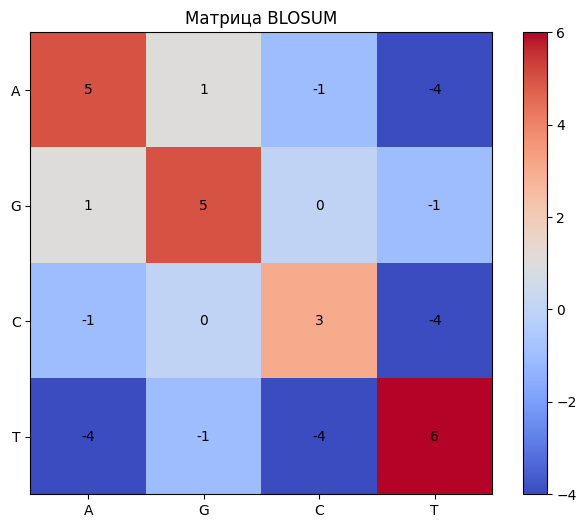

In [62]:
visualize_blosum_matrix(blosum_matrix, nucleotides)

# Реализация алгоритма Нидлмана-Вунша

### Шаг 5: Инициализация матрицы динамического программирования

Теперь перейдём к реализации алгоритма [Нидлмана-Вунша](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm).

Реализуйте функцию `init`, которая по $m, n$ и ошибке $\sigma$ строит матрицу c $m + 1$ строкой и $n + 1$ столбцом:

$$A_{m,n} = \begin{pmatrix} 0 & -\sigma & \cdots & -n \sigma \\ -\sigma & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ -m\sigma & 0 & \cdots & 0 \end{pmatrix} $$

**Пример:**

```python
print(init(3, 3, 4))
[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]
```

In [63]:
def init(rows, cols, gap_penalty=10):
    matrix = [[0] * (cols + 1) for _ in range(rows + 1)]

    for j in range(1, cols + 1):
        matrix[0][j] = -j * gap_penalty

    for i in range(1, rows + 1):
        matrix[i][0] = -i * gap_penalty

    return matrix

In [64]:
print(init(3, 3, 4))

[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]


In [65]:
class TestInitMatrix(unittest.TestCase):

    def test_3x3_matrix_with_default_gap(self):
        expected = [[0, -10, -20, -30],
                    [-10, 0, 0, 0],
                    [-20, 0, 0, 0],
                    [-30, 0, 0, 0]]
        result = init(3, 3)
        self.assertEqual(result, expected)

    def test_4x4_matrix_with_gap_penalty_5(self):
        expected = [[0, -5, -10, -15, -20],
                    [-5, 0, 0, 0, 0],
                    [-10, 0, 0, 0, 0],
                    [-15, 0, 0, 0, 0],
                    [-20, 0, 0, 0, 0]]
        result = init(4, 4, gap_penalty=5)
        self.assertEqual(result, expected)

    def test_1x1_matrix(self):
        expected = [[0, -10],
                    [-10, 0]]
        result = init(1, 1)
        self.assertEqual(result, expected)

    def test_5x3_matrix_with_gap_penalty_2(self):
        expected = [[0, -2, -4, -6],
                    [-2, 0, 0, 0],
                    [-4, 0, 0, 0],
                    [-6, 0, 0, 0],
                    [-8, 0, 0, 0],
                    [-10, 0, 0, 0]]
        result = init(5, 3, gap_penalty=2)
        self.assertEqual(result, expected)

    def test_0x0_matrix(self):
        expected = [[0]]
        result = init(0, 0)
        self.assertEqual(result, expected)

### Шаг 6: Заполнение матрицы динамического программирования

Пусть `a` и `b` - две последовательности, которые хотим выравнять. Теперь имея пустую матрицу, нужно научиться её заполнять. Для этого вспомним, как вычисляется очередной элемент матрицы:

$$A_{i \ j} = max \begin{cases} A_{i-1 \ j-1} + s(a_{i},b_{j}) & \ \text{Match / Mismatch}\\ A_{i \ j-1} - \sigma & \ \text{Insertion} \\ A_{i-1\ j} - \sigma & \ \text{Deletion} \end{cases}$$

где $s(a_{i},b_{j})$ - значение матрицы BLOSUM для нуклеотидов $a_{i}$ и $b_{j}$, $\sigma$ - штраф за пропуск символа в выравнивании (параметр)

### Шаг 7: Вычисление значения матрицы

Реализуйте функцию `get_new_score`, которая принимает на вход 5 параметров - `up` ($A_{i-1\ j}$), `left` ($A_{i \ j-1}$), `middle` ($A_{i-1 \ j-1}$), `s_score` ($s(a_{i},b_{j})$), `gap_penalty` ($\sigma$), и вычисляет значение для матрицы $A_{i\ j}$

**Пример:**

```python
print(get_new_score(0, 10, 2, 0, 2))
8
print(get_new_score(-16, -7, -14, 0, 2))
-9
```

In [66]:
def get_new_score(up, left, middle, s_score, gap_penalty):
    match_mismatch = middle + s_score
    insertion = left - gap_penalty
    deletion = up - gap_penalty

    return max(match_mismatch, insertion, deletion)

In [67]:
print(get_new_score(0, 10, 2, 0, 2))
print(get_new_score(-16, -7, -14, 0, 2))

8
-9


In [68]:
class TestGetNewScore(unittest.TestCase):

    def test_match_case(self):
        result = get_new_score(5, 7, 10, 2, 1)
        self.assertEqual(result, 12)

    def test_mismatch_case(self):
        result = get_new_score(5, 7, 10, -3, 1)
        self.assertEqual(result, 7)

    def test_insertion_case(self):
        result = get_new_score(3, 10, 5, 0, 2)
        self.assertEqual(result, 8)

    def test_deletion_case(self):
        result = get_new_score(12, 7, 6, 0, 3)
        self.assertEqual(result, 9)

    def test_all_negative(self):
        result = get_new_score(-5, -7, -10, -2, 1)
        self.assertEqual(result, -6)

    def test_zero_gap_penalty(self):
        result = get_new_score(8, 8, 8, 1, 0)
        self.assertEqual(result, 9)

unittest.main(argv=[''], verbosity=2, exit=False)

test_create_blosum_matrix (__main__.TestBlosumMatrix) ... ok
test_create_blosum_matrix_empty (__main__.TestBlosumMatrix) ... ok
test_unique_nucleotides (__main__.TestBlosumMatrix) ... ok
test_unique_nucleotides_empty (__main__.TestBlosumMatrix) ... ok
test_empty_alignments (__main__.TestCalculateFrequencies) ... ok
test_mixed_nucleotides (__main__.TestCalculateFrequencies) ... ok
test_simple_case (__main__.TestCalculateFrequencies) ... ok
test_single_nucleotide (__main__.TestCalculateFrequencies) ... ok
test_with_gaps (__main__.TestCalculateFrequencies) ... ok
test_basic_case (__main__.TestCalculateScores) ... ok
test_all_gaps (__main__.TestCountPairs) ... ok
test_example_1 (__main__.TestCountPairs) ... ok
test_example_2 (__main__.TestCountPairs) ... ok
test_no_pairs (__main__.TestCountPairs) ... ok
test_example_1 (__main__.TestGeneratePairs) ... ok
test_example_2 (__main__.TestGeneratePairs) ... ok
test_example_3 (__main__.TestGeneratePairs) ... ok
test_length (__main__.TestGeneratePa

### Шаг 8 Заполнение матрицы

Реализуйте функцию `align`,  которая на вход принимает две последовательности ДНК, штраф за пропуск ($\sigma$), матрицу BLOSUM и возвращает заполненную матрицу `A`.

**Пример:**

```python
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

print(align(top_seq, bottom_seq, gap_penalty, blosum_matrix))
[[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -1, -2, 2, 0, -2, -4, -6, -8],
 [-4, 2, 0, 0, 6, 4, 2, 0, -2],
 [-6, 0, 2, 6, 4, 4, 4, 2, 0],
 [-8, -2, 4, 4, 7, 5, 8, 6, 4],
 [-10, -4, 2, 2, 5, 9, 7, 10, 8]]
```

In [69]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

In [70]:
def align(top_seq, bottom_seq, gap_penalty, blosum_matrix):
    matrix = init(len(top_seq), len(bottom_seq), gap_penalty)

    for i in range(1, len(top_seq) + 1):
        for j in range(1, len(bottom_seq) + 1):
            s_score = blosum_matrix[top_seq[i - 1]][bottom_seq[j - 1]]
            matrix[i][j] = get_new_score(
                matrix[i - 1][j],
                matrix[i][j - 1],
                matrix[i - 1][j - 1],
                s_score,
                gap_penalty
            )

    return matrix

In [71]:
print(align(top_seq, bottom_seq, gap_penalty, blosum_matrix))

[[0, -2, -4, -6, -8, -10], [-2, -4, 3, 1, -1, -3], [-4, -3, 1, 2, 6, 4], [-6, 2, 0, 7, 5, 3], [-8, 0, 7, 5, 8, 6], [-10, -2, 5, 3, 6, 11], [-12, -4, 3, 4, 8, 9], [-14, -6, 1, 2, 6, 11], [-16, -8, -1, 0, 4, 9]]


### Шаг 9: Построение выравнивания

Теперь имея матрицу выравнивания построим самое выравнивание.

Реализуйте функцию get_alignment, которая по двум последовательностям, матрице выравнивания, штрафа за пропуски, бонусам за совпадение/несовпадение нуклеотидов строит выравнивание.

**Пример:**

```python

top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
--TATGC-
AGTACGCA

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
ACTTCTACCCCAGC
AGT-CT-CCCC--C
```

In [72]:
def get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix):
    aligned_top = []
    aligned_bottom = []
    i, j = len(top_seq), len(bottom_seq)

    while i > 0 or j > 0:
        if i > 0 and j > 0:
            x = top_seq[i - 1]
            y = bottom_seq[j - 1]

        if i > 0 and j > 0 and sm[i][j] == sm[i - 1][j - 1] + blosum_matrix[x][y]:
            aligned_bottom.append(x)
            aligned_top.append(y)
            i -= 1
            j -= 1
        elif j > 0 and sm[i][j] == sm[i][j - 1] - gap_penalty:
            aligned_bottom.append('-')
            aligned_top.append(y)
            j -= 1
        else:
            aligned_bottom.append(x)
            aligned_top.append('-')
            i -= 1

    aligned_top.reverse()
    aligned_bottom.reverse()

    return "".join(aligned_top), "".join(aligned_bottom)

In [73]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

--TATGC-
TTTACGCA


In [74]:
top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

ACTTCTACCCCAGC
AG-TCT-CCCC--C


## Поздравляю! Мы научились выравнивать ДНК!